# Movie Dataset — Exploratory Data Analysis (EDA)
#### By: Andrew Gentilcore
## Introduction
This exploratory data analysis examines trends in movie performance using a dataset of over 5,000 films.  
The analysis focuses on four key areas:

1. **Audience engagement** (ratings, votes, reviews)  
2. **Financial performance** (budget vs. gross revenue)  
3. **Genre patterns and distributions**  
4. **Feature relationships and correlations**

The goal is to understand the factors that most strongly contribute to a movie’s commercial and audience success.


# Import Libraries & Load Data

#### Before exploring the dataset, it is important to understand its structure. The dataset includes numerical features such as budget, revenue, and ratings, as well as categorical information like genres, actors, and directors. Some columns contain missing values or incorrect types, so preparing the dataset is necessary before creating meaningful visualizations.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('movies.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Data Overview & Cleaning

#### Real-world movie data often comes with missing values or incorrect formats, so the first step is to clean the dataset. Several numeric columns, such as budget and gross, were stored as strings, so I converted them to numeric using pd.to_numeric() with errors='coerce', which turns invalid entries into NaN. Missing numeric values were then filled using the median, while missing categorical fields (like content rating and some actor names) were filled using the mode.

In [7]:
# Shape of dataset (rows, cols)
print("Shape:", df.shape)

Shape: (5043, 28)


In [8]:
# Overview of data types
print("\nData Types:")
print(df.dtypes)


Data Types:
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio             

In [9]:
# Summary statistics
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
color,5024,2,Color,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director_name,4939,2398,Steven Spielberg,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_critic_for_reviews,4993.0,NaN,NaN,NaN,140.194272,121.601675,1.0,50.0,110.0,195.0,813.0
duration,5028.0,NaN,NaN,NaN,107.201074,25.197441,7.0,93.0,103.0,118.0,511.0
director_facebook_likes,4939.0,NaN,NaN,NaN,686.509212,2813.328607,0.0,7.0,49.0,194.5,23000.0
actor_3_facebook_likes,5020.0,NaN,NaN,NaN,645.009761,1665.041728,0.0,133.0,371.5,636.0,23000.0
actor_2_name,5030,3032,Morgan Freeman,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor_1_facebook_likes,5036.0,NaN,NaN,NaN,6560.047061,15020.75912,0.0,614.0,988.0,11000.0,640000.0
gross,4159.0,NaN,NaN,NaN,48468407.526809,68452990.438753,162.0,5340987.5,25517500.0,62309437.5,760505847.0
genres,5043,914,Drama,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Missing Values

In [10]:
print(df.isnull().sum().sort_values(ascending=False))

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64


In [11]:
# Separate by data type
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numeric columns: ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
Categorical columns: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


In [12]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [13]:
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

## Rechecking Missing Values

In [14]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

color                     0
director_name             0
aspect_ratio              0
imdb_score                0
actor_2_facebook_likes    0
title_year                0
budget                    0
content_rating            0
country                   0
language                  0
dtype: int64


In [48]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['num_voted_users'] = pd.to_numeric(df['num_voted_users'], errors='coerce')

# Data Cleaning Summary
#### Before analysis, the dataset required several cleaning steps:
- ####  Imputed missing numerical values using the median.
- ####  Filled missing categorical values using the mode.
- ####  Converted budget, gross, and voting fields to numeric types.
- ####  Removed extreme outliers (top 1%) for visualizations where they distorted results.
####  These steps ensured that the dataset was consistent, complete, and ready for exploratory analysis.

# Correlation Heatmap

#### This heatmap visualizes how strongly different numerical variables are related, which allows us to identify which factors move together, such as budget and revenue.

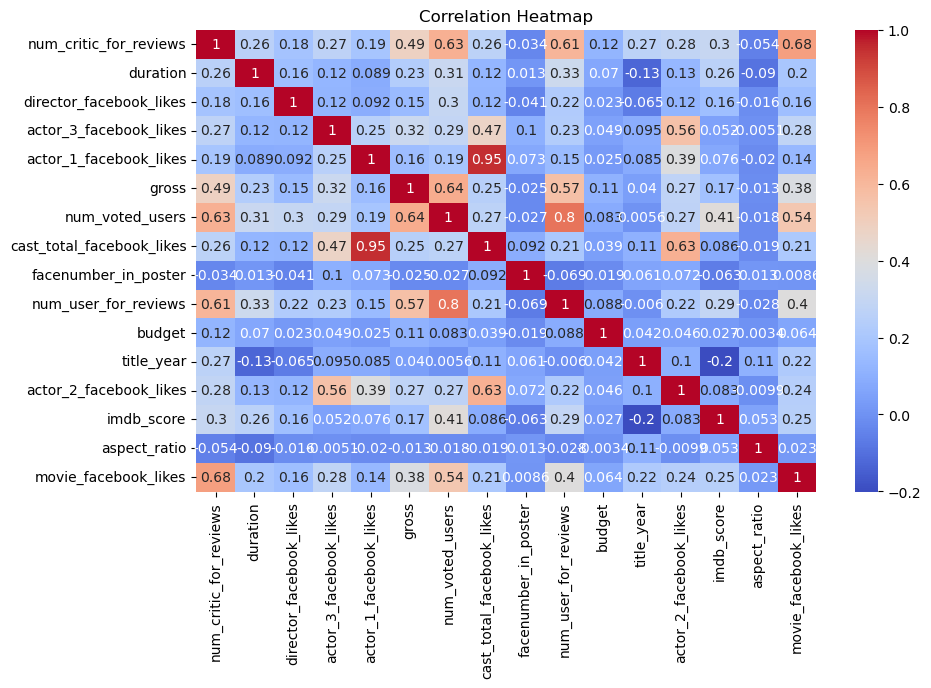

In [58]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### The correlation heatmap shows several meaningful relationships. Budget and gross revenue exhibit a strong positive correlation, suggesting that higher-budget films generally earn more at the box office. Gross revenue is also strongly correlated with the number of voted users, which makes sense because more popular movies accumulate more votes. The various Facebook-like metrics (for actors and movies) show moderate correlations with each other but weaker correlations with financial outcomes, indicating that social media engagement does not directly translate to higher earnings. Overall, budget and audience engagement appear to be the strongest predictors of revenue among the numerical features.

# Histogram

#### This visualization shows the distribution of audience ratings across all movies in the dataset, which helps us understand whether movies tend to receive high, low, or average ratings.

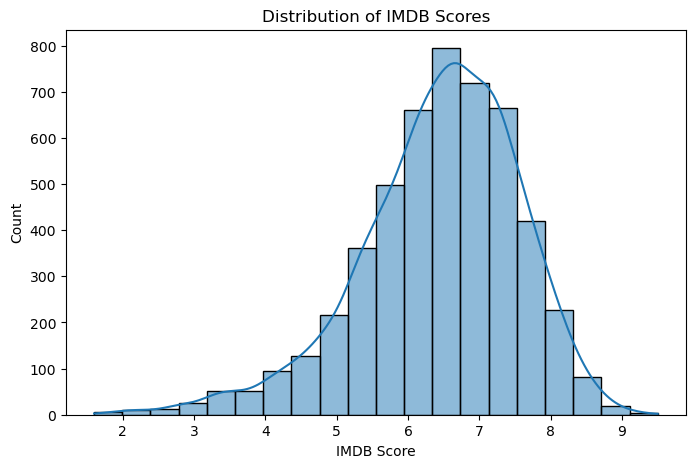

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDB Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.show()

### The histogram of movie ratings appears slightly skewed to the left, with most movies clustering around mid-range scores or 6 and 7 and fewer movies receiving very low or very high ratings. This suggests that most films tend to be rated as average to above-average, with extreme ratings on both sides being less common.

# Bar Chart

#### This bar chart displays the top 10 most frequently occurring genres, which gives us insight into which types of films are most commonly produced in the dataset.


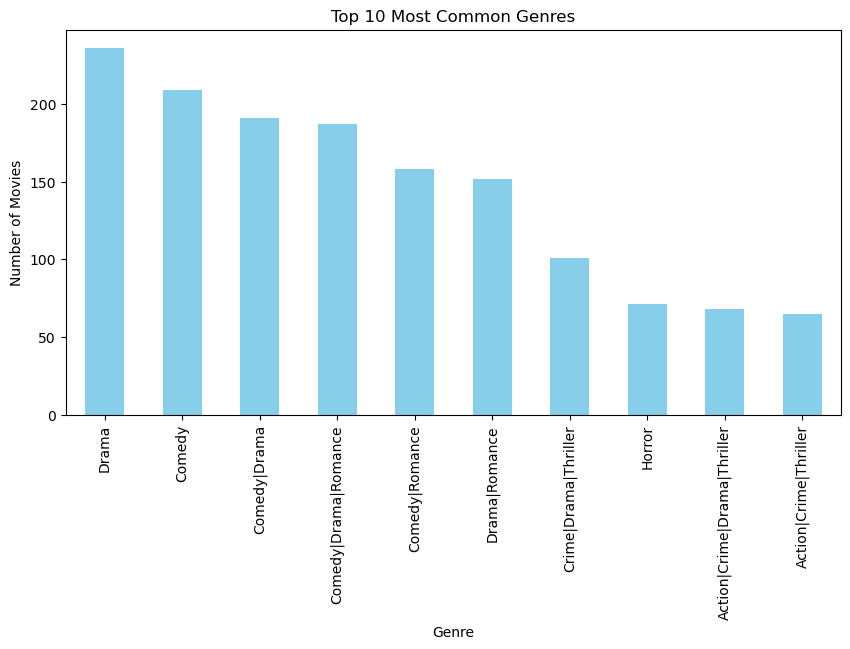

In [17]:
plt.figure(figsize=(10,5))
df['genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

### The bar chart shows that Drama is the most common genre in the dataset by a wide margin. This suggests that the film industry produces a large number of drama-focused movies, which may influence overall trends in ratings and audience preferences. Other genres like Comedy, Action, and Thriller appear frequently but at noticeably lower levels.

# Scatter Plot

#### This scatter plot examines whether movies with higher budgets tend to earn more gross revenue, which helps us explore the financial patterns in movie production.


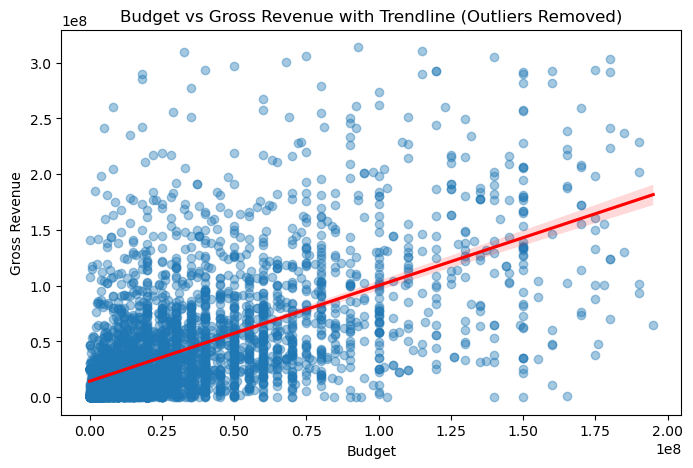

In [71]:
filtered = df[(df['budget'] > 0) & (df['gross'] > 0)]
filtered = filtered[
    (filtered['budget'] < filtered['budget'].quantile(0.99)) &
    (filtered['gross'] < filtered['gross'].quantile(0.99))
]



### After removing extreme outliers, the scatter plot shows that movies with higher budgets generally tend to earn higher gross revenue, although there is still wide performance variation. This suggests that while having a larger budget helps, it does not guarantee high revenue.

# Box Plot

### This boxplot compares the rating distributions of the most common genres, which helps us see which genres tend to perform better or worse with audiences.


### Many movies in the dataset belong to multiple genres (e.g., “Action|Adventure|Sci-Fi”). To simplify the analysis, I selected only the first listed genre and treated it as the movie’s primary category. I then identified the ten most common primary genres and filtered the dataset to include only those genres. This helps create a cleaner and more readable boxplot, since using all genre combinations would produce hundreds of categories and make the visualization unusable.

## What the code does

#### df['primary_genre'] = df['genres'].str.split('|').str[0]
#### Splits the genre string and keeps just the first genre.

#### value_counts().head(10)
#### Identifies the 10 most common primary genres.

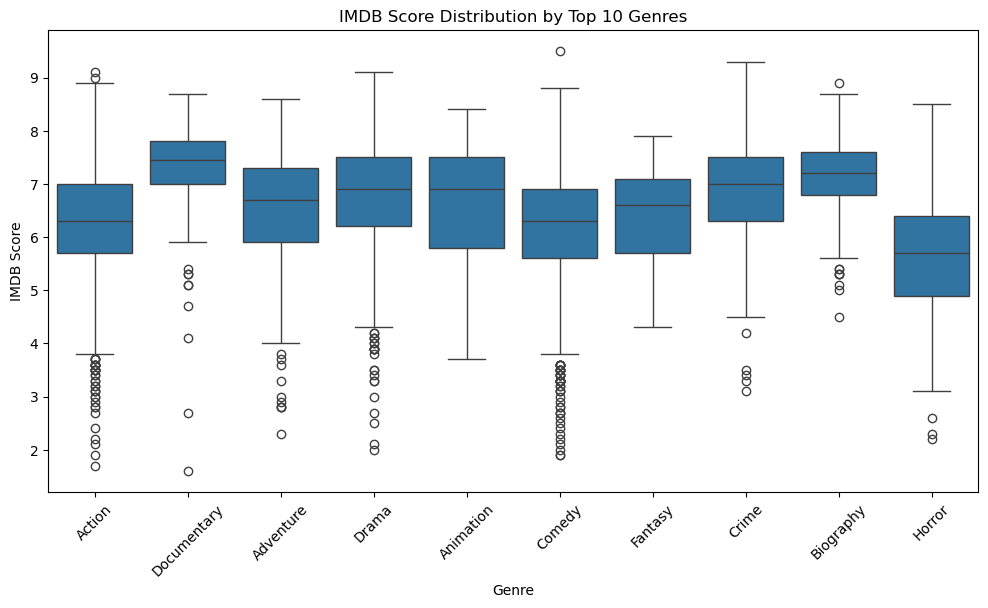

In [105]:
df['primary_genre'] = df['genres'].str.split('|').str[0]
top_genres = df['primary_genre'].value_counts().head(10).index
df_top = df[df['primary_genre'].isin(top_genres)]
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='primary_genre', y='imdb_score')
plt.xticks(rotation=45)
plt.title("IMDB Score Distribution by Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.show()

### Across the top 10 primary genres, IMDB scores show noticeable variation. Documentary, Biography, and Drama tend to have the highest median ratings, indicating stronger audience reception. Genres like Horror and Action show lower medians and wider variability, suggesting more inconsistent viewer responses. Overall, the boxplot shows that genre plays a meaningful role in rating patterns, with certain genres consistently receiving higher critical and audience scores.

# Conclusion

#### This exploratory data analysis provides a comprehensive look at how different factors influence movie performance. The dataset required several cleaning steps, including handling missing values, converting numerical fields, and removing extreme outliers to ensure accurate visualization and analysis.

# Overall, the findings show that:

#### Audience engagement metrics, such as number of votes and reviews are among the strongest indicators of a movie’s popularity and financial success.

#### Budget and gross revenue exhibit a clear positive relationship, suggesting that higher financial investment often contributes to higher box office earnings.

#### Genre plays a meaningful role in rating patterns: genres such as Documentary, Biography, and Drama tend to earn higher median IMDB scores, while Horror and Action show greater variability and lower medians.

#### Feature relationships observed in the correlation heatmap and pairplot highlight that revenue, budget, and audience engagement form the most interconnected cluster of variables.

#### Together, these insights reveal how financial investment, audience engagement, and genre characteristics contribute to both the commercial and critical success of films. This analysis establishes a solid foundation for future predictive modeling, such as forecasting box office revenue or understanding which features most strongly influence audience ratings.ictor.
